In [1]:
import h5py
import gym_robomimic
import gymnasium as gym
import matplotlib.pyplot as plt

dataset_path = "datasets/tool_hang/ph/low_dim_v15.hdf5"
# open file
f = h5py.File(dataset_path, "r")
# each demonstration is a group under "data"
demos = list(f["data"].keys())
num_demos = len(demos)
print("hdf5 file {} has {} demonstrations".format(dataset_path, num_demos))
env = gym.make("gym_robomimic/tool-hang-v0")
obs, info = env.reset()
renv = env.unwrapped.env

[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /home/ian/Documents/flare/robosuite/robosuite/scripts/setup_macros.py (macros.py:59)


hdf5 file datasets/tool_hang/ph/low_dim_v15.hdf5 has 200 demonstrations


[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)


Set input type to delta


agentview_image (256, 256, 3)


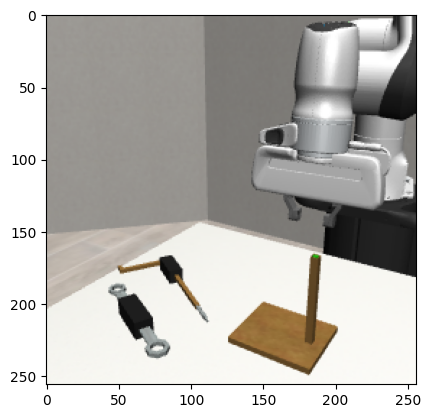

robot0_eye_in_hand_image (256, 256, 3)


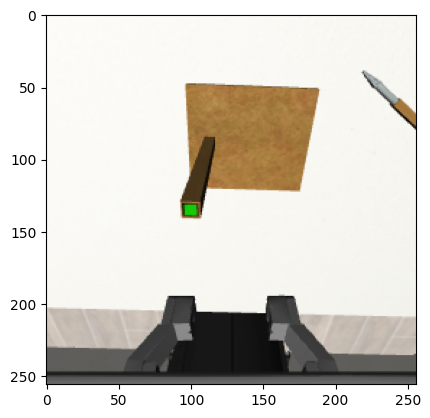

In [2]:

for key in obs['pixels']:
    print(key, obs['pixels'][key].shape)
    plt.imshow(obs['pixels'][key])
    plt.show()

In [3]:
from tqdm import tqdm
import imageio
import numpy as np

images = []
absolute_actions = []
demo_key = demos[1]
init_state = f["data/{}/states".format(demo_key)][0]
model_xml = f["data/{}".format(demo_key)].attrs["model_file"]
initial_state_dict = dict(states=init_state, model=model_xml)
env.reset_to(initial_state_dict)
actions = f["data/{}/actions".format(demo_key)][:]   

for a in tqdm(actions):
    obs, reward, terminated, truncated, info  = env.step(a)
    video_img = env.render()
    absolute_actions.append(info["absolute_action"])
    images.append(video_img)

video_path = "demo.mp4"
imageio.mimsave(video_path, images, fps=20)
# view the trajectories!
from IPython.display import Video
Video(video_path, embed=True)

/home/ian/miniconda3/envs/flare/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reset_to to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reset_to` for environment variables or `env.get_wrapper_attr('reset_to')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 613/613 [00:10<00:00, 59.33it/s]


In [5]:

init_state = f["data/{}/states".format(demo_key)][0]
model_xml = f["data/{}".format(demo_key)].attrs["model_file"]
initial_state_dict = dict(states=init_state, model=model_xml)
env.reset_to(initial_state_dict)
env.unwrapped.set_input_type("absolute")

# from gym_robomimic.transform_utils import np_axis_angle_from_rotation_6d, np_rotation_6d_from_axis_angle
# tmp_absolute_actions = np.array(axis_angle_absolute_actions).copy()
# absolute_actions = np.zeros((tmp_absolute_actions.shape[0], 10))
# absolute_actions[:, 0:3] = tmp_absolute_actions[:, 0:3]
# absolute_actions[:, 3:9] = np_rotation_6d_from_axis_angle(tmp_absolute_actions[:, 3:6])
# absolute_actions[:, 9] = tmp_absolute_actions[:, 6]
# print(absolute_actions[:9])

images = []
for a in tqdm(absolute_actions):
    obs, reward, terminated, truncated, info  = env.step(a)
    video_img = env.render()
    images.append(video_img)

video_path = "demo.mp4"
imageio.mimsave(video_path, images, fps=20)
# view the trajectories!
from IPython.display import Video
Video(video_path, embed=True)

Set input type to absolute


100%|██████████| 613/613 [00:10<00:00, 60.34it/s]
